In [119]:
graphics_toolkit('gnuplot');

In [120]:
a = 1;
b = 1.44;
c0 = 1.5;
c1 = 0;
c2 = -2.1;
c3 = -1.1;
c4 = 3.1;
P = @(x) c4*x.^4 + c3*x.^3 + c2*x.^2 + c1*x + c0;

In [121]:
% Я считал на калькуляторе и вышло ~1,5814 ( почти верно )
I_num = integral(P, a, b)



I_num = 1.5812


In [122]:
gauss_data = {
    % N=1 (1 узел)
    [0], [2];
    % N=2 (2 узла)
    [-0.577350269189626, 0.577350269189626], [1, 1];
    % N=3 (3 узла)
    [-0.774596669299540, 0, 0.774596669299540], [0.555555555555556, 0.888888888888888, 0.555555555555556];
    % N=4 (4 узла)
    [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052], ...
    [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]
};

In [123]:
N_nodes = [1, 2, 3, 4]
S_values = zeros(1, 4)
errors = zeros(1, 4)


N_nodes =

   1   2   3   4


S_values =

   0   0   0   0


errors =

   0   0   0   0



In [124]:
for k = 1:4
    t = gauss_data{k, 1};  % узлы
    A = gauss_data{k, 2};   % веса
    
    S = 0;
    for i = 1:length(t)
        x = (a + b)/2 + (b - a)/2 * t(i);
        S = S + A(i) * P(x);
    end
    S = (b - a)/2 * S;
    
    S_values(k) = S;
    errors(k) = abs(I_num - S);
end

In [125]:
fprintf('N\tS\t\t\tr\n');
for i = 1:4
    fprintf('%d\t%.18f\t%.18f\n', i, S_values(i), errors(i));
end


N	S			r



1	1.427564307839999325	0.153673810048000625
2	1.580954095502221657	0.000284022385778293
3	1.581238117911131225	0.000000000023131275
4	1.581238117887999950	0.000000000000000000


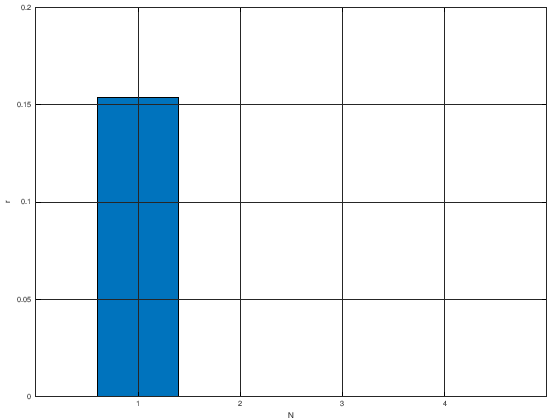

In [126]:
bar(N_nodes, errors);
xlabel('N');
ylabel('r');
grid on;